# Library

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pathlib
import scipy as sp

import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plt.style.use('seaborn-whitegrid') # Set the aesthetic style of the plots.
sns.set(style="white", color_codes=True)

# Meta Data

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit Project/application_train.csv')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,...,NaN,0.0805,NaN,0.0000,NaN,block of flats,0.0718,Panel,No,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


# EDA

In [ ]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
297469,444632,0,Cash loans,F,N,Y,0,67500.0,198000.0,9760.5,198000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.015221,-13470,-2970,-7064.0,-2660,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,8,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2073.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,5.0,0.0,0.0
104933,221766,0,Cash loans,F,N,N,0,135000.0,900000.0,38263.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.005313,-18266,-2319,-7166.0,-1695,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,SUNDAY,11,0,0,0,0,0,0,...,NaN,0.0461,NaN,0.0014,NaN,block of flats,0.0391,Panel,No,2.0,0.0,2.0,0.0,-607.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
197572,329068,0,Cash loans,M,Y,Y,0,90000.0,301464.0,19395.0,238500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.025164,-14799,-272,-786.0,-5243,16.0,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,15,0,0,0,0,0,0,...,0.0829,0.0929,0.0039,0.0062,reg oper account,block of flats,0.0806,Panel,No,4.0,2.0,4.0,2.0,-268.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
180481,309162,0,Cash loans,M,N,N,0,90000.0,144801.0,11335.5,117000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.010556,-10945,-2673,-4990.0,-3608,NaN,1,1,0,1,0,0,Laborers,1.0,3,3,MONDAY,10,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-817.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
20030,123366,0,Cash loans,F,N,N,0,315000.0,1288350.0,37669.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.018634,-18790,-1724,-2549.0,-2339,NaN,1,1,0,1,0,0,Sales staff,1.0,2,2,TUESDAY,19,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-631.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Kita mempunyai 122 kolom dengan 307511 baris data #fact1

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [ ]:
total_na = df.isna().sum().sort_values(ascending = False)
display(total_na)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

Dari data train yang kita miliki kita memiliki banyak fitur yang mempunyai missing value. #fact2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



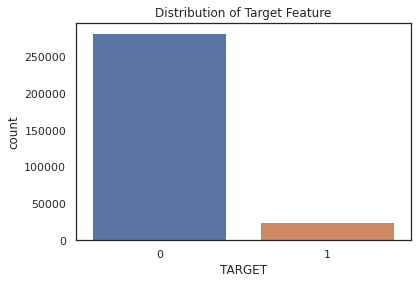

In [13]:
sns.countplot(df['TARGET']).set_title('Distribution of Target Feature')
plt.show()

Terjadi Imbalance pada fitur target di mana target yang berfungsi sebagai label memiliki data yang sangat dominan pada label 0 (credit yang tidak memiliki gangguan pembayaran angsuran) #fact3

# PreProcessing

# Feature Selection

In [14]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,...,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919,-0.029498,-0.022746,-0.009728,-0.022149,-0.018550,-0.034199,-0.019172,-0.044003,...,-0.019025,-0.043768,-0.033394,-0.011256,-0.024621,-0.032739,-0.002757,-0.013337,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.008494,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.879161,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.138470,-0.018015,-0.042710,-0.013222,-0.008464,0.006902,0.030172,0.000140,-0.007060,-0.008341,-0.009705,...,-0.008325,-0.009447,-0.008231,-0.002820,-0.007962,-0.010067,0.004133,0.000061,-0.008037,0.015593,-0.001262,0.015232,-0.001861,-0.005865,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,0.008506,-0.117273,0.000325,0.063994,-0.017193,-0.008290,0.000159,0.038378,0.016342,-0.085465,-0.

Dalam korelasi fitur yang terlihat kita akan menggunakan beberapa fitur saja yang memungkinkan untuk permodelan.

In [15]:
korelasi_fitur = df[['TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']]

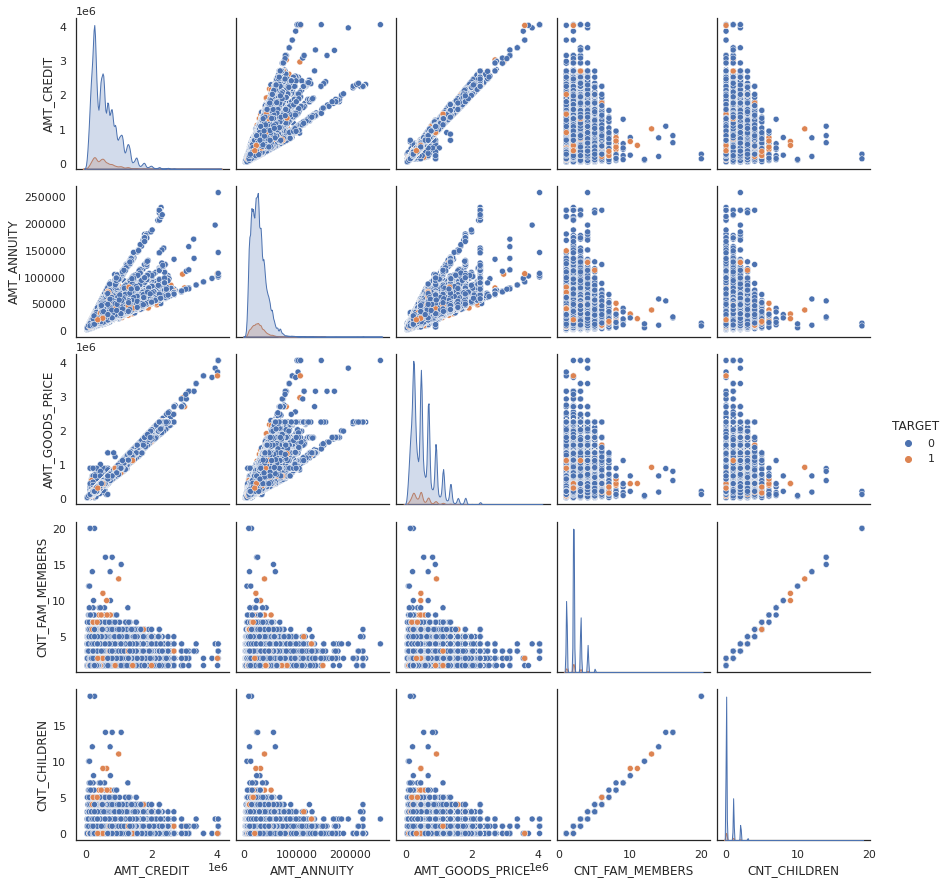

In [ ]:
sns.pairplot(korelasi_fitur, hue='TARGET')

Dilihat dari grafik yang di buat beberapa feature sangat erat hubungannya karena memiliki korelasi yang positif. Seperti 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', dan 'CNT_CHILDREN'. beberapa feature ini bisa di pilih untuk di masukan ke proses selanjutnya.

# Skewness

Karena kita masih memiliki missing value yang belum di atasi maka kita akan menentukan isi dari missing value tersebut dengan metode skewness.

In [16]:
total_na = korelasi_fitur.isna().sum().sort_values(ascending=False)
display(total_na)

AMT_GOODS_PRICE    278
AMT_ANNUITY         12
CNT_FAM_MEMBERS      2
CNT_CHILDREN         0
AMT_CREDIT           0
TARGET               0
dtype: int64

In [17]:
feature1=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']
df[feature1].skew(axis=0, skipna=True)

AMT_CREDIT         1.234778
AMT_ANNUITY        1.579777
AMT_GOODS_PRICE    1.349000
CNT_FAM_MEMBERS    0.987543
CNT_CHILDREN       1.974604
dtype: float64

Berdasarkan literasi statistik maka pada feature yang telah di pilih, bisa disimpulkan semua missing value akan diisi dengan nilai mean(rata-rata) hal ini di karenakan nilai skewness yang di dapat masuk dalam kategori normal.

# Missing Value

In [22]:
df_drop = ['AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',	'DAYS_BIRTH',	'DAYS_EMPLOYED', 'NAME_CONTRACT_TYPE',	'CODE_GENDER',	'FLAG_OWN_CAR',	'FLAG_OWN_REALTY',	'DAYS_REGISTRATION',	'DAYS_ID_PUBLISH',	'OWN_CAR_AGE',	'FLAG_MOBIL',	'FLAG_EMP_PHONE',	'FLAG_WORK_PHONE',	'FLAG_CONT_MOBILE',	'FLAG_PHONE',	'FLAG_EMAIL',	'REGION_RATING_CLIENT',	'REGION_RATING_CLIENT_W_CITY',	'HOUR_APPR_PROCESS_START',	'REG_REGION_NOT_LIVE_REGION',	'REG_REGION_NOT_WORK_REGION',	'LIVE_REGION_NOT_WORK_REGION',	'REG_CITY_NOT_LIVE_CITY',	'REG_CITY_NOT_WORK_CITY',	'LIVE_CITY_NOT_WORK_CITY',	'EXT_SOURCE_1',	'EXT_SOURCE_2',	'EXT_SOURCE_3',	'APARTMENTS_AVG',	'BASEMENTAREA_AVG',	'YEARS_BEGINEXPLUATATION_AVG',	'YEARS_BUILD_AVG',	'COMMONAREA_AVG',	'ELEVATORS_AVG',	'ENTRANCES_AVG',	'FLOORSMAX_AVG',	'ENTRANCES_MEDI',	'FLOORSMAX_MEDI',	'FLOORSMIN_MEDI',	'LANDAREA_MEDI',	'LIVINGAPARTMENTS_MEDI',	'LIVINGAREA_MEDI',	'NONLIVINGAPARTMENTS_MEDI',	'NONLIVINGAREA_MEDI',	'TOTALAREA_MODE',	'OBS_30_CNT_SOCIAL_CIRCLE',	'DEF_30_CNT_SOCIAL_CIRCLE',	'OBS_60_CNT_SOCIAL_CIRCLE',	'DEF_60_CNT_SOCIAL_CIRCLE',	'DAYS_LAST_PHONE_CHANGE',	'FLAG_DOCUMENT_2',	'FLAG_DOCUMENT_3',	'FLAG_DOCUMENT_4',	'FLAG_DOCUMENT_5',	'FLAG_DOCUMENT_6',	'FLAG_DOCUMENT_7',	'FLAG_DOCUMENT_8',	'FLAG_DOCUMENT_9',	'FLAG_DOCUMENT_10',	'FLAG_DOCUMENT_11',	'FLAG_DOCUMENT_12',	'FLAG_DOCUMENT_13',	'FLAG_DOCUMENT_14',	'FLAG_DOCUMENT_15',	'FLAG_DOCUMENT_16',	'FLAG_DOCUMENT_17',	'FLAG_DOCUMENT_18',	'FLAG_DOCUMENT_19',	'FLAG_DOCUMENT_20',	'FLAG_DOCUMENT_21',	'AMT_REQ_CREDIT_BUREAU_HOUR',	'AMT_REQ_CREDIT_BUREAU_DAY',	'AMT_REQ_CREDIT_BUREAU_WEEK',	'AMT_REQ_CREDIT_BUREAU_MON',	'AMT_REQ_CREDIT_BUREAU_QRT',	'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE',	'OCCUPATION_TYPE',	'WEEKDAY_APPR_PROCESS_START',	'ORGANIZATION_TYPE',	'FLOORSMIN_AVG',	'LANDAREA_AVG',	'LIVINGAPARTMENTS_AVG',	'LIVINGAREA_AVG',	'NONLIVINGAPARTMENTS_AVG',	'NONLIVINGAREA_AVG',	'APARTMENTS_MODE',	'BASEMENTAREA_MODE',	'YEARS_BEGINEXPLUATATION_MODE',	'YEARS_BUILD_MODE',	'COMMONAREA_MODE',	'ELEVATORS_MODE',	'ENTRANCES_MODE',	'FLOORSMAX_MODE',	'FLOORSMIN_MODE',	'LANDAREA_MODE',	'LIVINGAPARTMENTS_MODE',	'LIVINGAREA_MODE',	'NONLIVINGAPARTMENTS_MODE',	'NONLIVINGAREA_MODE',	'APARTMENTS_MEDI',	'BASEMENTAREA_MEDI',	'YEARS_BEGINEXPLUATATION_MEDI',	'YEARS_BUILD_MEDI',	'COMMONAREA_MEDI',	'ELEVATORS_MEDI',	'FONDKAPREMONT_MODE',	'HOUSETYPE_MODE',	'WALLSMATERIAL_MODE',	'EMERGENCYSTATE_MODE'] 

In [23]:
df_new = df.drop(df_drop,1)

In [24]:
df_new.tail(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS
307506,456251,0,0,254700.0,27558.0,225000.0,1.0
307507,456252,0,0,269550.0,12001.5,225000.0,1.0
307508,456253,0,0,677664.0,29979.0,585000.0,1.0
307509,456254,1,0,370107.0,20205.0,319500.0,2.0
307510,456255,0,0,675000.0,49117.5,675000.0,2.0


In [29]:
df_new.isna().sum()

SK_ID_CURR           0
TARGET               0
CNT_CHILDREN         0
AMT_CREDIT           0
AMT_ANNUITY         12
AMT_GOODS_PRICE    278
CNT_FAM_MEMBERS      2
dtype: int64

In [30]:
df_new['AMT_ANNUITY'].fillna(df_new['AMT_ANNUITY'].mean(), inplace=True)
df_new['AMT_GOODS_PRICE'].fillna(df_new['AMT_GOODS_PRICE'].mean(), inplace=True)
df_new['CNT_FAM_MEMBERS'].fillna(df_new['CNT_FAM_MEMBERS'].mean(), inplace=True)

In [31]:
df_new.isna().sum()

SK_ID_CURR         0
TARGET             0
CNT_CHILDREN       0
AMT_CREDIT         0
AMT_ANNUITY        0
AMT_GOODS_PRICE    0
CNT_FAM_MEMBERS    0
dtype: int64

# Modeling

# Dummy Data

In [32]:
dumies_df = pd.get_dummies(df_new)

In [33]:
dumies_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS
0,100002,1,0,406597.5,24700.5,351000.0,1.0
1,100003,0,0,1293502.5,35698.5,1129500.0,2.0
2,100004,0,0,135000.0,6750.0,135000.0,1.0
3,100006,0,0,312682.5,29686.5,297000.0,2.0
4,100007,0,0,513000.0,21865.5,513000.0,1.0


## Split Data

In [35]:
X = dumies_df.drop(['TARGET', 'SK_ID_CURR'], axis = 1)
y = dumies_df['TARGET']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 123)

# Imbalance Hendling

In [37]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(random_state=123)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [38]:
X_under, y_under = undersampling.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [39]:
X_under = pd.DataFrame(X_under, columns=X.columns)

In [40]:
y_under = pd.DataFrame(y_under)

In [41]:
y_under.value_counts()

1    17377
0    17377
dtype: int64

In [42]:
y_under.value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

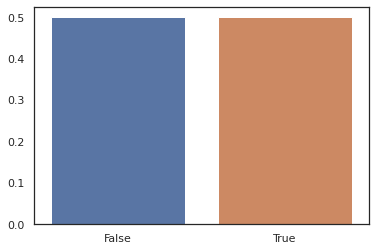

In [43]:
sns.barplot(x=[True,False], y=y_under.value_counts(normalize=True))

fitur target yang Imbalance kami lakukan undersampling agar simbang.

# MinMax Scalar

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X_under)
X_transform = pd.DataFrame(X_transform,columns = X.columns)

In [45]:
X_transform

,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS
0,0.090909,0.191743,0.108091,0.177215,0.166667
1,0.000000,0.061864,0.128309,0.063291,0.083333
2,0.090909,0.158185,0.164871,0.177215,0.166667
3,0.090909,0.045196,0.069774,0.050633,0.083333
4,0.090909,0.205279,0.104782,0.189873,0.166667
...,...,...,...,...,...
34749,0.000000,0.146886,0.214891,0.164557,0.083333
34750,0.000000,0.047600,0.099475,0.044304,0.000000
34751,0.090909,0.102143,0.151755,0.091139,0.166667
34752,0.090909,0.045485,0.044794,0.032911,0.083333


# Accuracy

In [46]:
def evaluasi_model(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)*100

KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_transform,y_under)
accuracy = evaluasi_model(knn,X_test,y_test)
print('accuracy : {0:.5f}%'.format(accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



accuracy : 91.92230%


Decission Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_transform, y_under)
accuracy = evaluasi_model(model_tree,X_test,y_test)
print('accuracy : {0:.5f}%'.format(accuracy))

accuracy : 91.92664%
